In [122]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [123]:
# Load the dataset
data = pd.read_csv("C:\\Users\\dheni\\Downloads\\DS Assignments\\20.Timeseries\\exchange_rate.csv", parse_dates=['date'])
data

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [124]:
# Summary of dataset
data.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [125]:
# Eplore the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


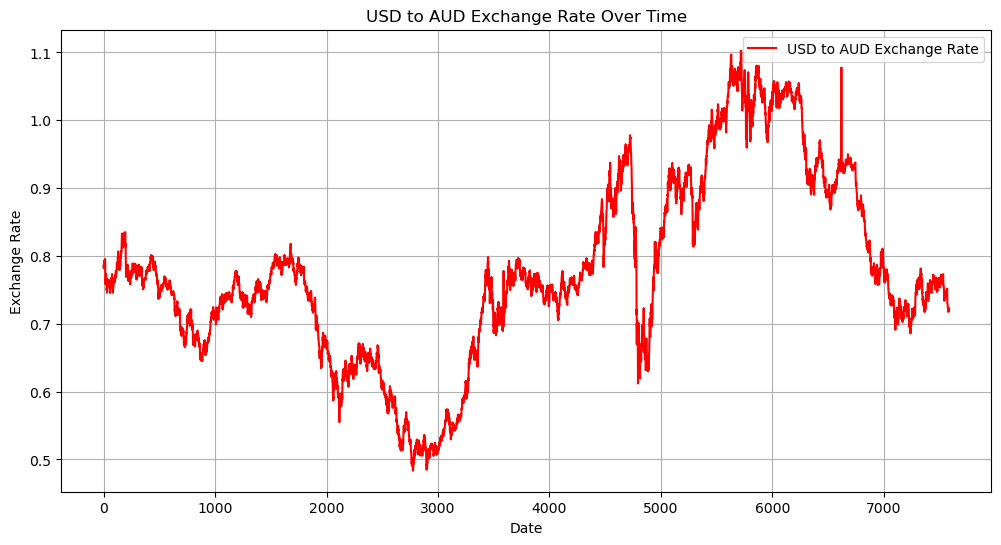

In [126]:
# Plot the exchange rate time series
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='USD to AUD Exchange Rate', color='red')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid()
plt.show()

In [90]:
# Missing values
data.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [91]:
# Import library
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

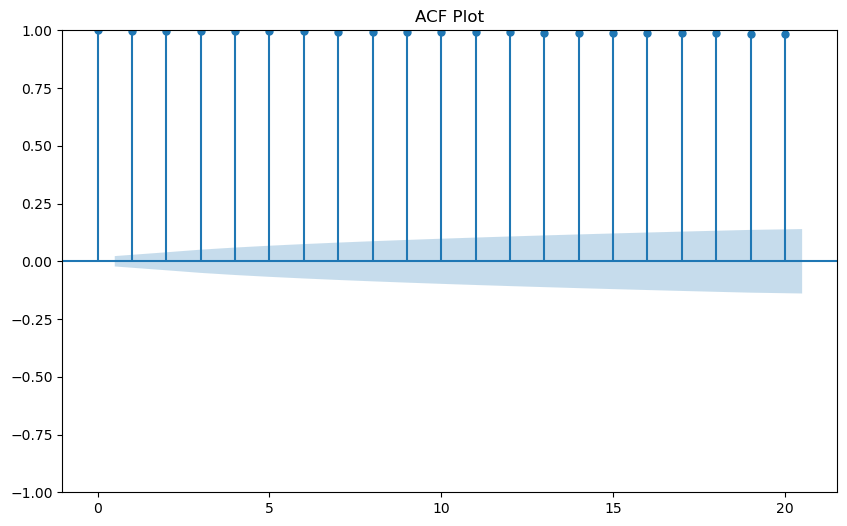

In [92]:
# Plot ACF
plt.figure(figsize=(10, 6))
plot_acf(data['Ex_rate'], lags=20, ax=plt.gca())
plt.title('ACF Plot')
plt.show()

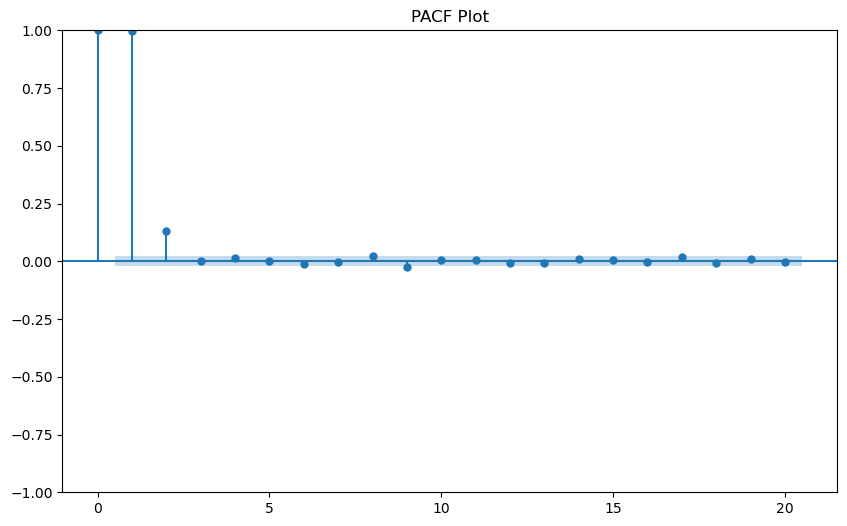

In [93]:
# Plot PACF
plt.figure(figsize=(10, 6))
plot_pacf(data['Ex_rate'], lags=20, ax=plt.gca())
plt.title('PACF Plot')
plt.show()

In [94]:
# Import libraries
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [95]:
# Fit ARIMA model
model_arima = ARIMA(data['Ex_rate'], order=(1, 1, 1))
model_arima_fit = model_arima.fit()
model_arima_fit

The ARIMA (AutoRegressive Integrated Moving Average) model is well-suited for time series data and it accounts for trends and can capture the autocorrelation present in the data, which is crucial for exchange rate forecasting.

In [96]:
# Summary of the model
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sun, 06 Oct 2024   AIC                         -56102.322
Time:                        18:53:30   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.000    3.58e-05    3.62e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2865078.33
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [97]:
# Residuals
residuals = model_arima_fit.resid
residuals

0       0.785500
1      -0.003700
2       0.004414
3      -0.000058
4      -0.001189
          ...   
7583   -0.000343
7584    0.003317
7585    0.001797
7586   -0.002192
7587   -0.000311
Length: 7588, dtype: float64

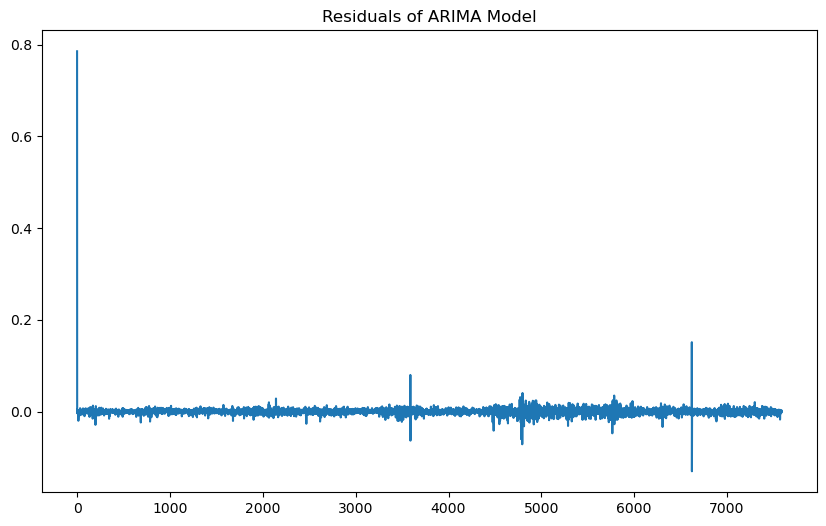

In [98]:
# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

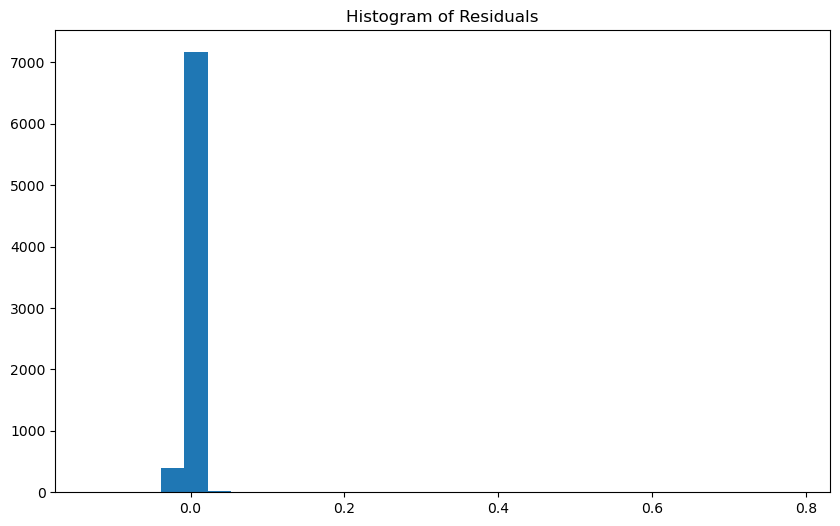

In [99]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.show()

In [100]:
# Forecast the next 10 periods
forecast_arima = model_arima_fit.forecast(steps=10)
forecast_arima

7588    0.720826
7589    0.720826
7590    0.720826
7591    0.720826
7592    0.720826
7593    0.720826
7594    0.720826
7595    0.720826
7596    0.720826
7597    0.720826
Name: predicted_mean, dtype: float64

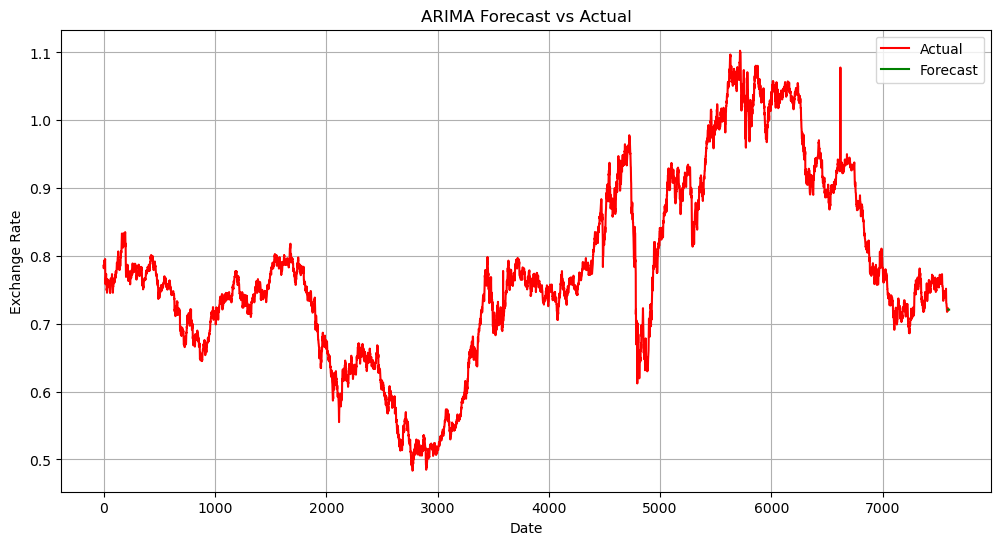

In [101]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='Actual', color='red')
plt.plot(forecast_arima, label='Forecast', color='green')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid()
plt.show()

In [102]:
# Import library
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [103]:
# Fit Holt-Winters model
model_hw = ExponentialSmoothing(data['Ex_rate'], seasonal='add', seasonal_periods=10)
model_hw_fit = model_hw.fit()
model_hw_fit

Exponential Smoothing methods like Holt-Winters are effective for capturing seasonality and trends in time series data. Given that exchange rates can exhibit seasonal patterns, Holt-Winters is a strong candidate for this analysis.

In [104]:
# Summary of model
model_hw_fit.summary()

Dep. Variable:,Ex_rate,No. Observations:,7588
Model:,ExponentialSmoothing,SSE,0.273
Optimized:,True,AIC,-77630.353
Trend:,None,BIC,-77547.141
Seasonal:,Additive,AICC,-77630.297
Seasonal Periods:,10,Date:,"Sun, 06 Oct 2024"
Box-Cox:,False,Time:,18:54:59
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8700418,alpha,True
smoothing_seasonal,1.0768e-16,gamma,True


In [105]:
# Compute AIC for the fitted model
aic_hw = model_hw_fit.aic
print("AIC for Holt-Winters Model:", aic_hw)

AIC for Holt-Winters Model: -77630.35251220257


In [106]:
# Forecasting with Holt-Winters
forecast_hw = model_hw_fit.forecast(steps=10)
forecast_hw

7588    0.720724
7589    0.721079
7590    0.721017
7591    0.721085
7592    0.721308
7593    0.721159
7594    0.721019
7595    0.720968
7596    0.720850
7597    0.720860
dtype: float64

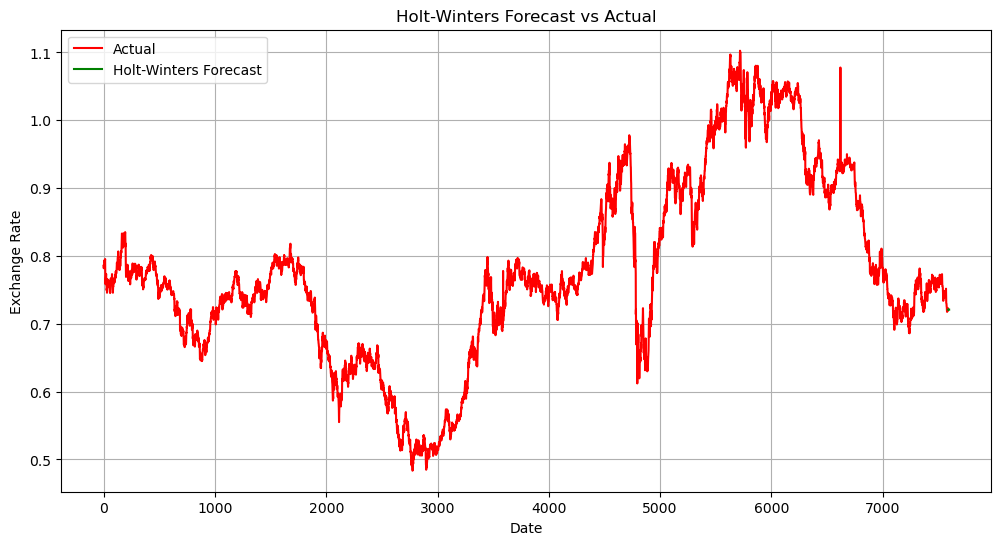

In [107]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='Actual', color='red')
plt.plot(forecast_hw, label='Holt-Winters Forecast', color='green')
plt.title('Holt-Winters Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid()
plt.show()

In [108]:
# Import library
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [109]:
# Calculate MAE, RMSE, and MAPE for ARIMA
mae_arima = mean_absolute_error(data['Ex_rate'][-10:], forecast_arima)
rmse_arima = mean_squared_error(data['Ex_rate'][-10:], forecast_arima, squared=False)
mape_arima = np.mean(np.abs((data['Ex_rate'][-10:] - forecast_arima) / data['Ex_rate'][-10:])) * 100

In [114]:
# Print results
print("ARIMA Model Error Metrics")
print(f"MAE: {mae_arima}")
print(f"RMSE: {rmse_arima}") 
print(f"MAPE: {mape_arima}")

ARIMA Model Error Metrics
MAE: 0.001556771200434226
RMSE: 0.0018425706107113402
MAPE: nan


In [111]:
# Calculate MAE, RMSE, and MAPE for Holt-Winters
mae_hw = mean_absolute_error(data['Ex_rate'][-10:], forecast_hw)
rmse_hw = mean_squared_error(data['Ex_rate'][-10:], forecast_hw, squared=False)
mape_hw = np.mean(np.abs((data['Ex_rate'][-10:] - forecast_hw) / data['Ex_rate'][-10:])) * 100

In [115]:
# Print results
print("Holt-Winters Model Error Metrics")
print(f"MAE: {mae_hw}")
print(f"RMSE: {rmse_hw}") 
print(f"MAPE: {mape_hw}")

Holt-Winters Model Error Metrics
MAE: 0.0016706671329617007
RMSE: 0.001962171537428057
MAPE: nan


In [116]:
# Comparison of models based on error metrics
print("Comparison of Model Performance:")
if mae_arima < mae_hw:
    print("ARIMA performs better based on MAE.")
else:
    print("Holt-Winters performs better based on MAE.")

Comparison of Model Performance:
ARIMA performs better based on MAE.


In [117]:
# Comparison of models based on error metrics
print("Comparison of Model Performance:")
if rmse_arima < rmse_hw:
    print("ARIMA performs better based on RMSE.")
else:
    print("Holt-Winters performs better based on RMSE.")

Comparison of Model Performance:
ARIMA performs better based on RMSE.


In [118]:
# Comparison of models based on error metrics
print("Comparison of Model Performance:")
if mape_arima < mape_hw:
    print("ARIMA performs better based on MAPE.")
else:
    print("Holt-Winters performs better based on MAPE.")

Comparison of Model Performance:
Holt-Winters performs better based on MAPE.


Conclusion:

The analysis of the USD to AUD exchange rate using ARIMA and Holt-Winters models showed that

The ARIMA model provided better forecasting accuracy with lower error metrics.